Задача: предсказать какие из пассажиров выжили во время крушения Титаника.
Так как данная задача - задача бинарной классификации, способом её решения я выберу: "Бэггинг", который опирается на "Дерерво решений". "Дерево решений" выглядет как алгоритм или инструкция,что делать в какой ситуации, выявляются параметры, которые играют существенную роль. В зависимости от параметров строится модель, которая в итоге выдает ответы или распределяет объекты в тот или иной класс. Когда компьютер строит модель дерева решенйи он пытается роазделить какие из факторов являются самыми важными, потом какие менее важны и т.д. вплоть до того, когда уже становится очевидно к какомму классу отнести тот или ной объект.Чтобы использовать алгоритм Бэггинг, необходимо разбить основной датасэт на более мелкие датасэты и в каждом мелком датасэте использовать все теже признаки как и в основном. Далее нужно агригировать результаты и сравнить их с другими методами.
В библиотеке Scikit-learn уже есть классификатор Bagging - это метаоценка ансамбля, которая подбирает базовые классификаторы  
для каждого случайного подмножества исходного набора данных, а затем объединяет их индивидуальные прогнозы 
(путем голосования или усреднения) для формирования окончательного прогноза под названием BaggingClassifier.

In [44]:
#Импортируем библиотеки и модули

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import BaggingClassifier

In [45]:
#Загрузка и визуализация данных 

Data_titanic = pd.read_csv('Titanic.csv')
Data_titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [46]:
#Предварительная работа с данными 

colums_target = ['Survived'] #Поле Servived - будет являться целевым полем
colums_train = ['Pclass', 'Sex', 'Age', 'Fare' ] #Поля Pclass, Sex, Age, Fare - будут полями для обучения

In [47]:
#Необходимо создать переменные в которых будут находиться данные, которые хронятся в целевой колонке и обущающих колонках

Train = Data_titanic[colums_train] #переменная Х
Target = Data_titanic[colums_target] #переменная Y

Важно проверить качесвто данных, поэтому первоочередно нужно проверить есть ли пустые ячеки в данных, чтобы проверить наличие пустых ячеек воспользуюсь формулой: isnull().sum()

In [48]:
Target['Survived'].isnull().sum()

0

In [49]:
Train['Pclass'].isnull().sum()

0

In [50]:
Train['Sex'].isnull().sum()

0

In [51]:
Train['Age'].isnull().sum()

177

In [52]:
Train['Fare'].isnull().sum()

0

При проверке полей было вявлено, что есть 177 пассажиров у которых не указан возраст (Age), просто удалить 177 пассажиров 
из выборки состоящей из 891 пассажира нельзя, так как это сильно повлияет на результат. Обычно в таких случаях придают среднее или медианное значение по этому полю. С помощью нормального распределения я смогу сделать корректный выбор, какой способ заполнения NaN использовать.

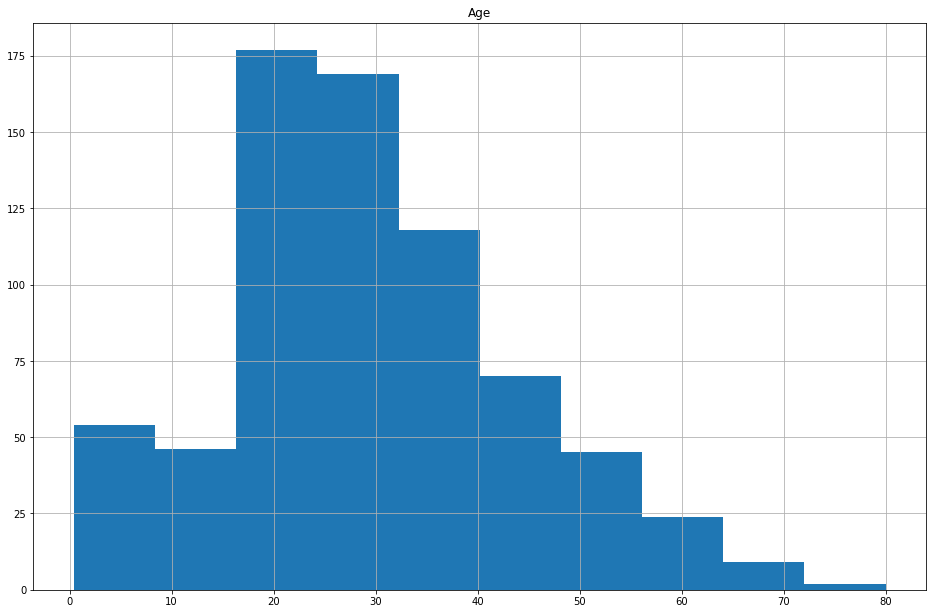

In [53]:
Data_titanic_age = ['Age']
DTA = Data_titanic[Data_titanic_age]
DTA.hist(figsize = (16,24), layout=(2,1))
plt.show()

Я буду спользовать медианное значение, так как видно на графике отклонения распределения от нормального закона. В таком случае среднее значение использовать некорректно, медианое (в отличие от среднего значения) устойчив к «выбросам». 

Специальная функция в библиотеке pandas - fillna возвращает DataFrame, но NaN, замененны новыми значениями. Во время выполнения кода ниже появляется предупреждение, которое информирует о том, что значение пытается быть установлено на копии фрагмента из DataFrame мне это и нужно, поэтому я продолжаю работать с кодом

In [54]:
Train['Age']= Train['Age'].fillna(Train['Age'].median())

In [55]:
#Проверяем есть ли пустые ячейки в поле Age(возраст)

Train['Age'].isnull().sum()

0

В модели sklearn нельзя использовать переменную типа string, а в моей выборке как раз такая есть - это Sex. В переменной пол пассажира (Sex) прописано 'male' и 'female', соответсвено, для того чтобы модель работала нужно заменить 'male' на 1, а 'female' на 0. Сделать это можно с помощью словаря. Можно отключить розовые предупреждения использую код в настройках pandas

In [56]:
pd.options.mode.chained_assignment = None #отключил розовые предупреждения
new_sex = {'male':1, 'female':0} #словарь
Train['Sex'] = Train['Sex'].apply(lambda Train:new_sex[Train]) #С помощью этого кода мы меняем данные в data set

In [57]:
#Необходимо проверить как теперь выглядет колонка с полом пассажира, проверю на 10 первых значениях

Train['Sex'].head(10)

0    1
1    0
2    0
3    0
4    1
5    1
6    1
7    1
8    0
9    0
Name: Sex, dtype: int64

Отлично. Теперь нужно разделить данные на две части: 1.Тренеровочные данные (на которых обучаю модель); 2.Тестовая данные (проверка работы модели). Импортирую из sklearn.model_selection train_test_split, которой позволит разбить данные на две выборки, размер тестовой (test_size) выборки будет равен 30%, параметр random_state определяет способ разделения набора данных.

In [58]:
from sklearn.model_selection import train_test_split
Train_train, Train_test, Target_train, Target_test = train_test_split(Train,Target, test_size = 0.2, random_state = 42)

После того, как я разделил выборку на обучающую и тестовую, необходимо указать глубину дерева с помощью classifire. В классификаторе я буду использовать раяд параметров таких как max_depth и random_state. Max_depth обозначает глубину дерева, так как признаков не много и выборка не большая, думаю значение max_depth=5 будет достаточно(чем больше глубина, тем точность, предполагается, будет больше, но на обучение модели будет тратиться больше времени). Random_state - это номер результата, его можно указать любой, основная задача - это с помощью номера random_state воспроизвести результат, который я посчитаю лучшим.

In [59]:
DT = tree.DecisionTreeClassifier(max_depth = 5, random_state = 1)

In [60]:
#Теперь можно приступить к обучению модели с помощью бэггинга
#Сначала я язадаю инструкцию для создания бэггинга и указываю, что за основную модель (base_estimator) беру модель дерева решений (CF)
#колличесвто подвыборок (деревьев) будет равно 100
Bagging = BaggingClassifier(base_estimator = DT, n_estimators=100)

In [61]:
#Обучаю модель "Бэггинга"
#Функция fit находит коэффициенты для уравнения, заданного с помощью используемого алгоритма

Bagging.fit(Train_train,Target_train)

C:\Users\germa\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=5,
                                                        random_state=1),
                  n_estimators=100)

In [63]:
def result():
    x = round(Bagging.score(Train_test,Target_test)* 100, 2)
    print(f'Проверка показала, что модель предсказывает с точность {y}%, выжил пассажир или нет.')
result()

Проверка показала, что модель предсказывает с точность 80.45%, выжил пассажир или нет.
